In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv')
df.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [3]:
#checking for nullvalues
df.isnull().sum()

Age        0
Premium    0
dtype: int64

In [4]:
#checking for duplicates
df[df.duplicated()]

,Age,Premium


In [5]:
#correlation between dependent and independent features
df.corr()

,Age,Premium
Age,1.000000,0.984332
Premium,0.984332,1.000000


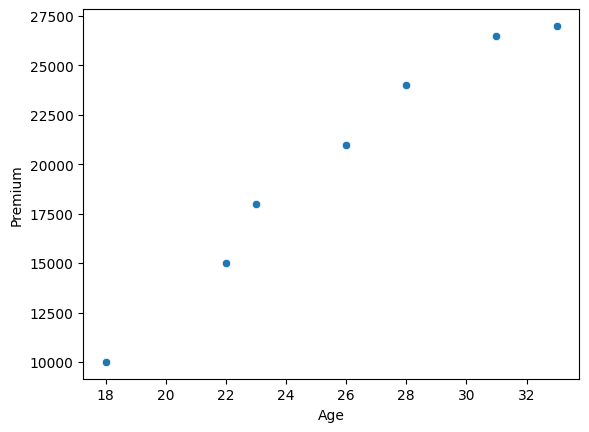

In [7]:
sns.scatterplot(data=df,x='Age',y='Premium')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


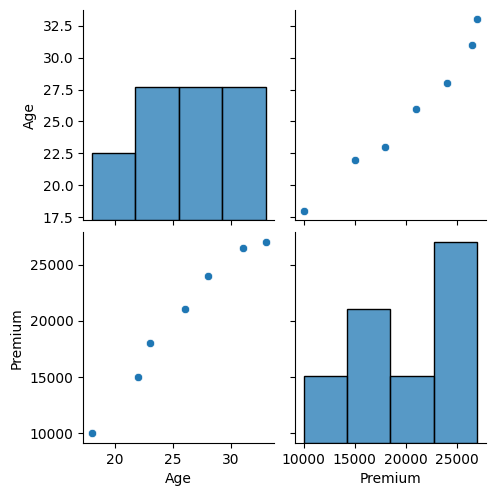

In [8]:
sns.pairplot(df)

In [11]:
#converting the dependent and independent feeatures
X=df[['Age']]
y=df['Premium']
print(X.shape)
print(y.shape)

(7, 1)
(7,)


In [14]:
#Train Test Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=8)
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape)
print('t_test.shape:',y_test.shape)

X_train.shape: (5, 1)
X_test.shape: (2, 1)
y_train.shape: (5,)
t_test.shape: (2,)


In [15]:
#performing standerdization on training data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train,X_test)

[[-1.53485153]
 [ 0.2192645 ]
 [ 0.65779351]
 [ 1.31558703]
 [-0.65779351]] [[-0.43852901]
 [ 1.75411604]]


In [18]:
#ML Model for linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
#predict the model on the test data
y_pred=lr.predict(X_test)
y_pred

array([16665.38461538, 29838.46153846])

In [27]:
new_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
new_df

,actual,predicted
2,18000,16665.384615
6,27000,29838.461538


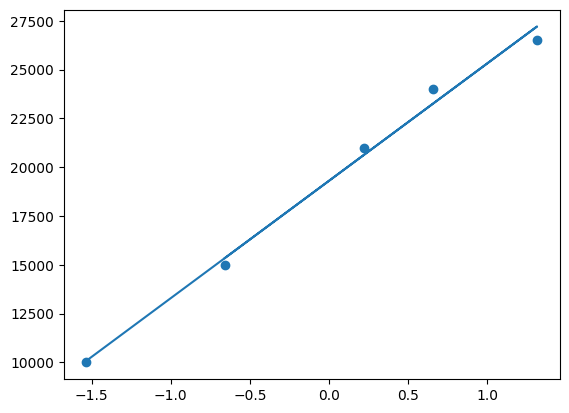

In [53]:
#creating best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [54]:
#perfomance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print('mean square error :',mse)
print('mean absolute error :',mae)
print('root mean square error :',rmse)
print('r2 :',r2)

mean square error : 4919031.065088756
mean absolute error : 2086.538461538461
root mean square error : 2217.888875730422
r2 : 0.7570848856746293


In [63]:

# Calculate R² from your predictions
r2 = r2_score(y_test, y_pred)

# Number of observations in the test set
n = len(y_test)

# Number of predictors/features used in the model
p = X_train.shape[1]

# Check if n - p - 1 is positive
if n > p + 1:
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
else:
    adj_r2 = float('-inf')  # or handle the case as needed

print('Adjusted R²:', adj_r2)

Adjusted R²: -inf
